In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import orth

import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt

plt.style.use(['dark_background', 'bmh'])
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize= (8, 5), dpi=200)

In [2]:
'''
    N1 : The dimension of ambient space
    n1 : The number of inliers
    n2 : The number of outliers
    r : The rank of low rank matrix
'''
N1, n1, n2, r = 200, 100, 10000, 5
N1, n1, n2, r = 200, 100, 10000, 5

In [3]:
# Generate singals by randomly drawn
U = np.random.randn(N1, r)

# Generate Synthetic dataset
A = np.matmul(U, np.random.randn(r, n1))
U = orth(U)

B = np.random.randn(N1, n2)

print(f'A.shape : {A.shape}')
print(f'B.shape : {B.shape}')

A.shape : (200, 100)
B.shape : (200, 10000)


In [4]:
# Given data
D = np.concatenate([A, B], axis = 1)
print(f'D.shape : {D.shape}')


D.shape : (200, 10100)


In [5]:
ind = np.random.permutation(D.shape[1])

labels = np.ones(D.shape[1])
labels[n1:] = 0

labels = labels[ind]
D = D[:, ind]
print(f'D.shape : {D.shape}')

D.shape : (200, 10100)


In [6]:
# from scipy.io import loadmat
# temp_data = loadmat('./test_data.mat')
# D = temp_data['D']

In [7]:
# Set # of samples by CoP algirithm to form the recovered subspace
n = 10 * 3

In [8]:
def coherence_pursuit(D , n):
    '''
        N1 : The dimension of ambient space
        n1 : The number of inliers
        n2 : The number of outliers
        r : The rank of low rank matrix
    '''

    n = np.fix(n).astype(np.int64)
    N1, _ = D.shape

    # 1. Subtract the meidian

    # 2. Compute L2 norm of r-th columns of D0
    T = np.sum(D ** 2, axis = 0) ** 0.5 # rms amplitude
    T_aug = np.tile(T, (N1, 1)) # For element-wise division

    # 3. Normalize the columns of M0
    X = D/T_aug

    # 4. Compute the pairwise mutual coherence matrix
    G = np.matmul(X.T, X)

    # 5. Compute the coherence vector g as the L1-norm
    G = G - np.diag(np.diag(G))
    p = np.sum(G ** 2, axis = 0)
    p = p/np.max(p)

    b = np.argsort(p)
    b = b[::-1]
    Y = X[:, b[:n]]


    # Compute the factor by Singular Value Decomposition
    Uhat, _, _ = np.linalg.svd(Y, full_matrices = False)
    return Uhat, p, T

In [9]:
Uhat, p, T = coherence_pursuit(D, n)
r = np.fix(r).astype(np.int64)
Uh = Uhat[:, :r]

In [10]:
err = Uh - U@U.T@Uh
err = err.reshape(-1)

print(np.linalg.norm(err, 2))
print(np.linalg.norm(U.reshape(-1), 2))

1.7846879012074185e-15
2.2360679774997902


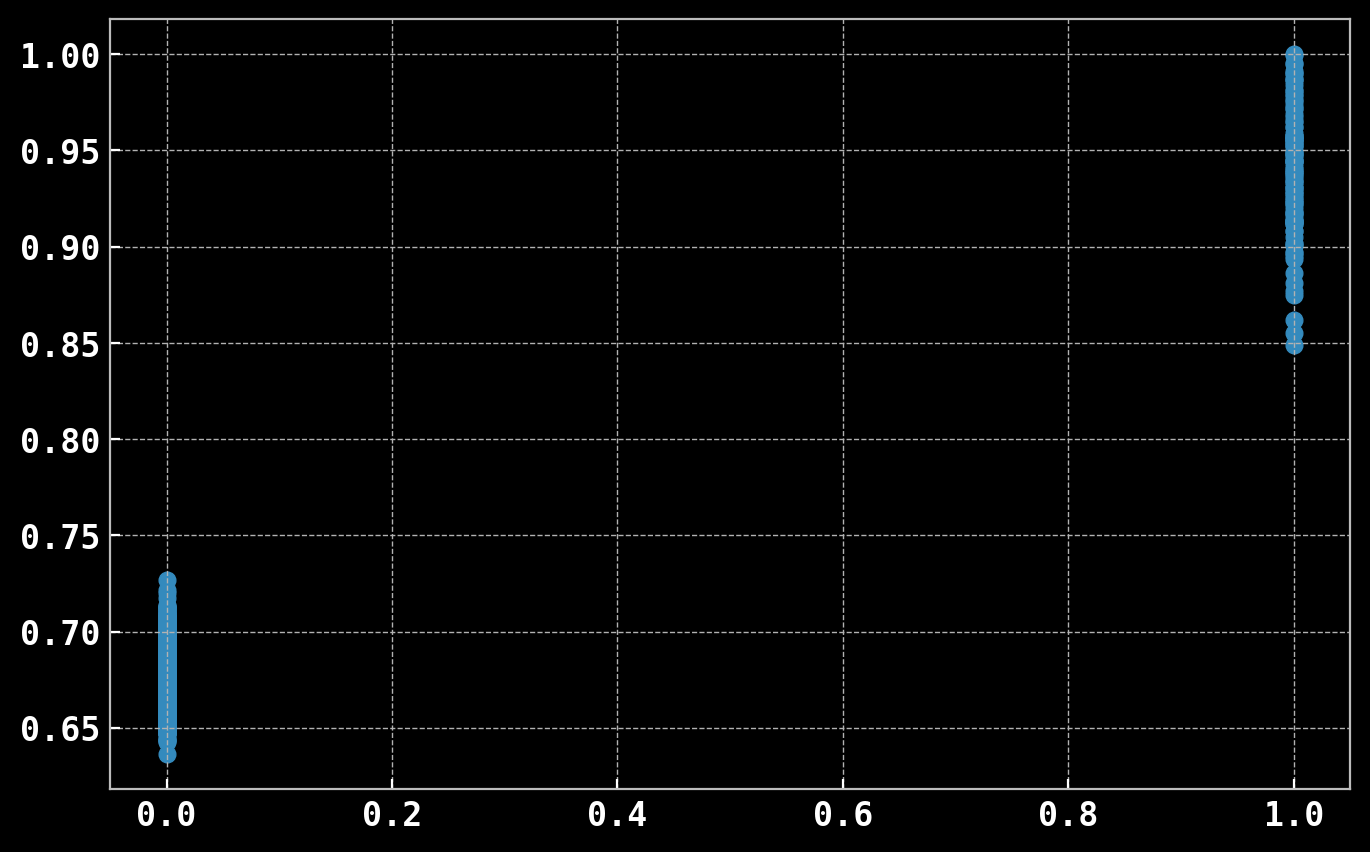

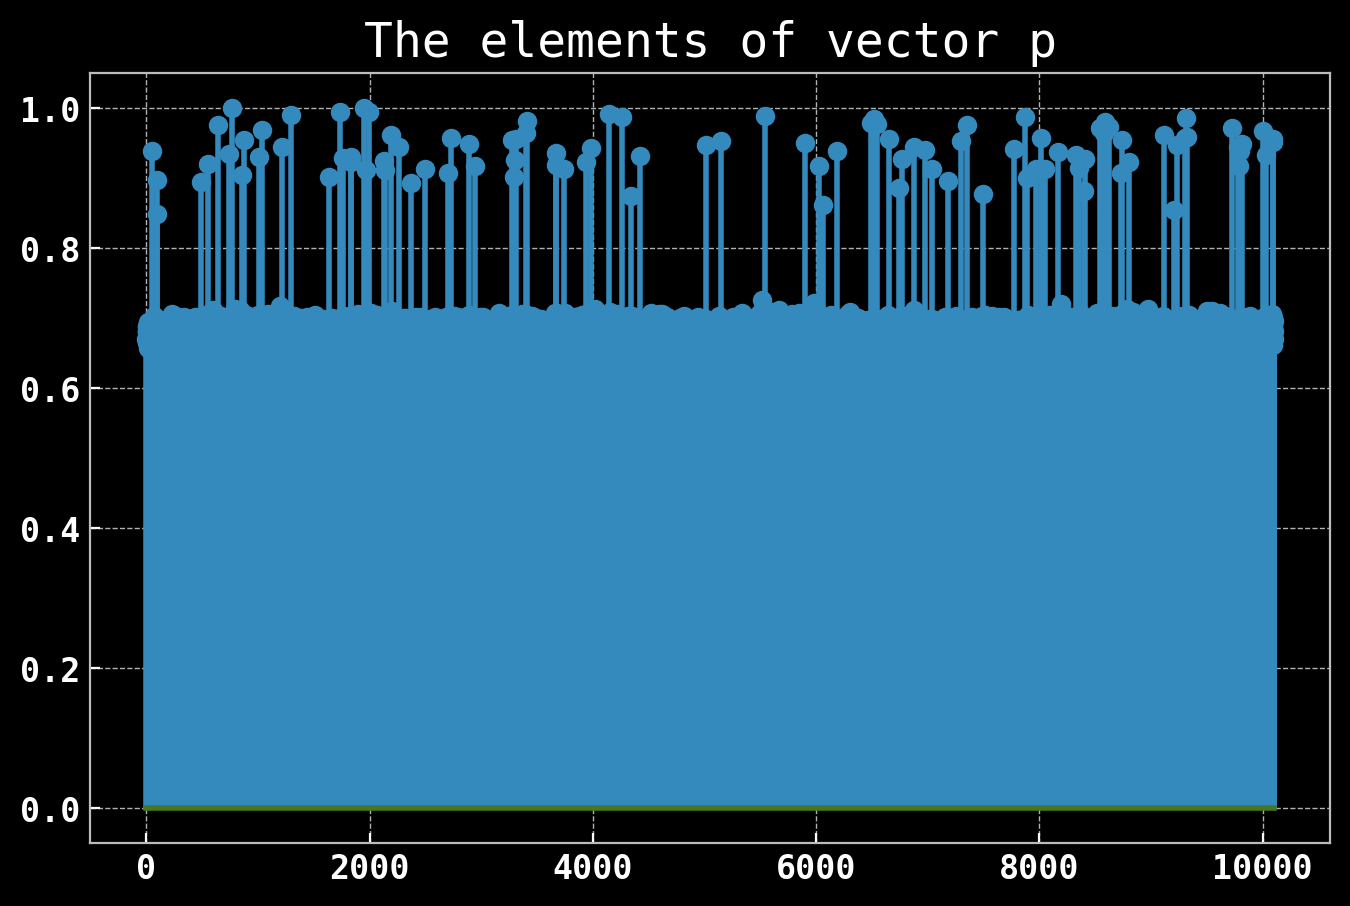

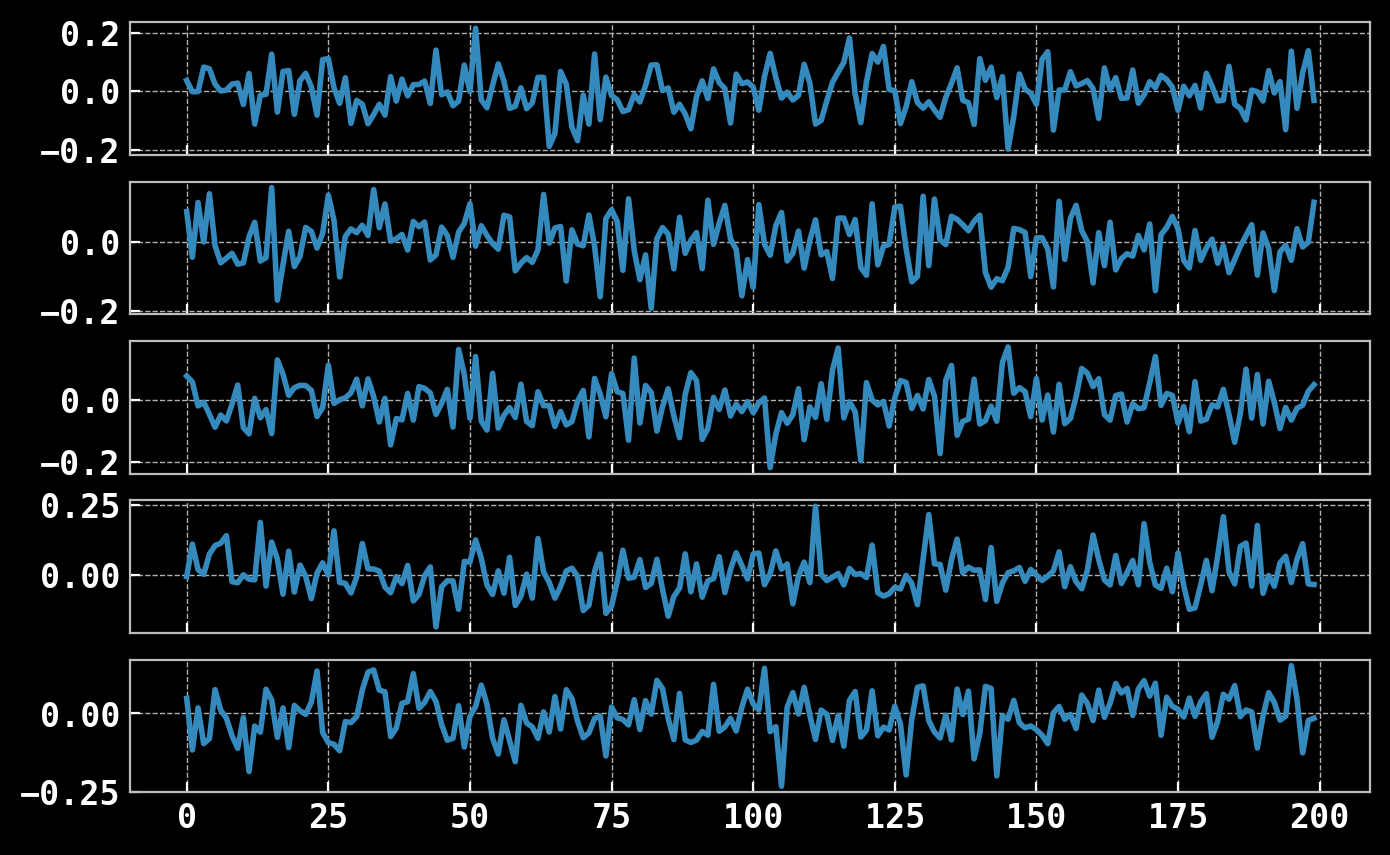

In [11]:
plt.scatter(labels, p)
plt.show()

plt.stem(p)
plt.title('The elements of vector p')
plt.grid(True)
plt.show()

fig, axs = plt.subplots(5, 1, sharex = True)
for i in range(5):
    axs[i].plot(Uh[:,i])
plt.grid(True)
plt.show()